##**Fake News Detection using** **NLP**
The main objective is to develop and compare multiple models to accurately classify news as real or fake, with a focus on optimizing accuracy and F1-score.


# Project Workflow:
Text Preprocessing: Cleaning and preparing the data using tokenization, stopword removal, and lemmatization.

Feature Extraction: Converting text into numerical vectors using both CountVectorizer and TF-IDF Vectorizer.

Model Development: Implemented and evaluated three different approaches:

countVectorizer + Naive Bayes , TF-IDF + Random Forest, TF-IDF + Naive Bayes

Model Evaluation: Compared all models using accuracy, confusion matrix, and F1-score to determine the most effective approach.

#Importing all required libraries

In [7]:
# Data handling
import pandas as pd
import numpy as np

# Text preprocessing
import re
import string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Feature extraction
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Machine learning models
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier

# Model evaluation
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Optional - Visualization
import matplotlib.pyplot as plt
import seaborn as sns


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


#Reading the data

In [2]:
df = pd.read_csv("/content/data.csv", on_bad_lines='skip', encoding='utf-8')
df.head()

,label,title,text,subject,date
0,1,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,1,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,1,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,1,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


#Preprocessing on data

*   Dropping few columns
*   checking for nulls


Dropping Title,subject and date columns (To detect fake news or not, these columns are not very relevant as we have text column also)

In [3]:
df = df.drop(columns = ["title","subject","date"], axis = 1)

Checking the class imbalance

In [4]:
df["label"].value_counts() #It seems classes are balanced

,count
label,
1,19999
0,19943


Checking for nulls in the dataset

In [5]:
df.isnull().sum() # there is no null value

,0
label,0
text,0


Function for all data cleaning
             



### Text Preprocessing Pipeline Summary

This function prepares raw text data for NLP tasks like classification:

- **Tokenization**: Splits text into individual words.
- **Stopword Removal**: Removes common, less informative words like "the", "is", etc.
- **Punctuation & Number Removal**: Keeps only alphabetic characters to avoid noise.
- **Lemmatization**: Converts words to their root form (e.g., "running" → "run").

➡ This standardizes the text, reduces noise, and improves the performance of models like Naive Bayes and Random Forest by focusing on meaningful words.


In [17]:
# Download required resources
def text_preprocessing_pipeline(text):
    # Step 1: Tokenize the text
    tokens = word_tokenize(text)

    # Step 2: Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word.lower() for word in tokens if word.lower() not in stop_words]


    # Step 3: Remove punctuation and numbers
    tokens = [re.sub(r'[^a-zA-Z]', '', word) for word in tokens]  # Keep only letters
    tokens = [word for word in tokens if word]  # Remove empty strings

    # Step 4: Lemmatization
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in tokens]

    return ' '.join(lemmatized_tokens)

In [9]:
df['clean_text'] = df['text'].apply(text_preprocessing_pipeline)


In [20]:
df['clean_text'][0]

'washington reuters the head conservative republican faction u congress voted month huge expansion national debt pay tax cut called fiscal conservative sunday urged budget restraint in keeping sharp pivot way among republican u representative mark meadow speaking cbs face nation drew hard line federal spending lawmaker bracing battle january when return holiday wednesday lawmaker begin trying pas federal budget fight likely linked issue immigration policy even november congressional election campaign approach republican seek keep control congress president donald trump republican want big budget increase military spending democrat also want proportional increase nondefense discretionary spending program support education scientific research infrastructure public health environmental protection the trump administration already willing say we going increase nondefense discretionary spending percent meadow chairman small influential house freedom caucus said program now democrat saying en

In [22]:
df['clean_text'][39937]

'the left organizing decade george soros funding from chaos occupy wall street black life matter wherever chaos anarchy america george soros democrat party usually behind there report several year voter fraud effort suggested george soros involved this another example involvement scheme effect result election america using vast global network a new campaign touted october surprise end trump seeking mobilise secret swing state million mostly unregistered global citizen progressive american living abroad vote u electionthe million american abroad almost never vote this dead easy tool fix make famous http tcozllekdub avaaz avaaz september the initiative launched london united kingdom wednesday avaaz registered u charity one world largest powerful activist group linked globalist billionaire george soros campaigner toured university college london parliament blasting bruce springsteen born usa chanting don vote trump open top buswhile illegal registered u charity work presidential candidate

In [9]:
df

,label,text,clean_text
0,1,WASHINGTON (Reuters) - The head of a conservat...,washington reuters head conservative republica...
1,1,WASHINGTON (Reuters) - Transgender people will...,washington reuters transgender people allowed ...
2,1,WASHINGTON (Reuters) - The special counsel inv...,washington reuters special counsel investigati...
3,1,WASHINGTON (Reuters) - Trump campaign adviser ...,washington reuters trump campaign adviser geor...
4,1,SEATTLE/WASHINGTON (Reuters) - President Donal...,seattlewashington reuters president donald tru...
...,...,...,...
39937,0,"The Left has been organizing for decades, and ...",left organizing decade george soros funding ch...
39938,0,Monica Crowley offers some of the most brillia...,monica crowley offer brilliant political analy...
39939,0,Protest underway in Charlotte: Things got com...,protest underway charlotte thing got completel...
39940,0,"Local Charlotte, NC news station WSOCTV is rep...",local charlotte nc news station wsoctv reporti...


# Train Test Split

In [12]:
X = df['clean_text']
y = df['label']  # 'fake' or 'real'

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape


((31953,), (7989,))

#Model 1: CountVectrorizer + NaiveBayes

###  Feature Extraction using CountVectorizer (Bag of Words)

We use `CountVectorizer` to convert our text data into numerical vectors using the Bag-of-Words approach.
- It removes English stopwords like "the", "is", etc.
- It builds a vocabulary from training data.
- It converts each text into a vector of word frequencies.

We apply `.fit_transform()` on training data (learn + convert) and `.transform()` on test data (only convert using learned vocab).


> Note: We've already removed stopwords during preprocessing using NLTK.
> Therefore, passing `stop_words='english'` to `CountVectorizer` is optional — and redundant in our case.


In [26]:
cv = CountVectorizer(stop_words='english')
X_train_cv = cv.fit_transform(X_train)
X_test_cv = cv.transform(X_test)

In [27]:
print("Vocabulary size:", len(cv.vocabulary_))
print("Example features:", list(cv.vocabulary_.keys())[:10])


Vocabulary size: 154457
Example features: ['minneapolis', 'mayoral', 'candidate', 'raymond', 'dehn', 'proposes', 'disarming', 'cop', 'wake', 'damond']


#Basic Model Training (MultinomialNB)

we trained a basic Multinomial Naive Bayes model on CountVectorizer features. The model calculates word probabilities for each class (fake or real) and uses Bayes’ theorem to make predictions.
Note: This is your baseline model using default alpha=1.0.





In [32]:
nb1 = MultinomialNB()
nb1.fit(X_train_cv, y_train)
pred1 = nb1.predict(X_test_cv)

print("Model 1 Accuracy:", accuracy_score(y_test, pred1))

Model 1 Accuracy: 0.9341594692702466


#Hyperparameter Tuning using GridSearchCV (MultinomialNB)

The alpha parameter in Naive Bayes controls smoothing, which avoids zero probabilities for unseen words. We used GridSearchCV to find the best alpha value from [0.01, 0.1, 0.5, 1.0, 2.0] using 5-fold cross-validation.

In [60]:
from sklearn.model_selection import GridSearchCV

params = {'alpha': [0.01, 0.1, 0.5, 1.0, 2.0]}
#grid = GridSearchCV(MultinomialNB(), param_grid=params, cv=5, scoring='accuracy')
grid = GridSearchCV(MultinomialNB(), param_grid=params, cv=5, scoring='accuracy', return_train_score=True)
grid.fit(X_train_cv, y_train)

print("Best alpha:", grid.best_params_)
print("Best accuracy:", grid.best_score_)


Best alpha: {'alpha': 0.01}
Best accuracy: 0.9418207872034448


## Final Model Evaluation (CountVectrorizer + NaiveBayes)

After finding the best alpha (0.01), defaut was 1.0 using GridSearchCV, we used the optimized Naive Bayes model (`best_estimator_`) to predict labels on the test dataset.

We then evaluated the model's performance using **accuracy**, **precision**, **recall**, and **F1-score**.

This allows us to compare the tuned model with the default model and confirm whether the hyperparameter tuning improved the performance.

In [61]:
best_nb = grid.best_estimator_
y_pred_best = best_nb.predict(X_test_cv)

📌 Default Alpha (alpha=1.0):
Accuracy: 0.9341594692702466
F1 Score: 0.9352376262004433

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.92      0.93      3996
           1       0.92      0.95      0.94      3993

    accuracy                           0.93      7989
   macro avg       0.93      0.93      0.93      7989
weighted avg       0.93      0.93      0.93      7989


Confusion Matrix:
 [[3665  331]
 [ 195 3798]]

📌 Best Alpha (GridSearch):
Accuracy: 0.9445487545374891
F1 Score: 0.9449484279855846

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.94      0.94      3996
           1       0.94      0.95      0.94      3993

    accuracy                           0.94      7989
   macro avg       0.94      0.94      0.94      7989
weighted avg       0.94      0.94      0.94      7989


Confusion Matrix:
 [[3744  252]
 [ 191 3802]]


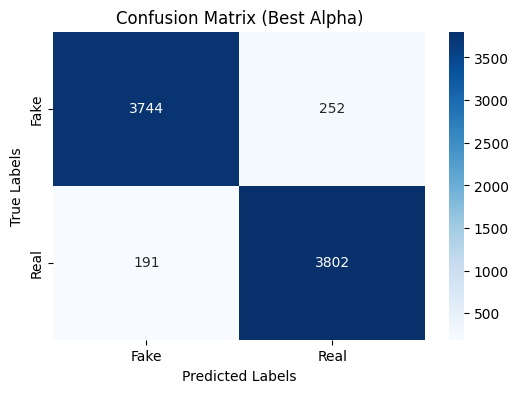

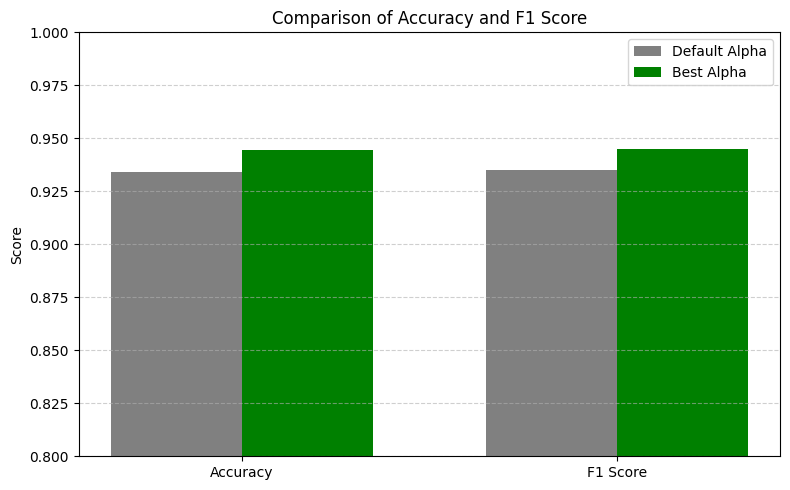

In [62]:
# Accuracy & F1 score for default alpha
acc_default = accuracy_score(y_test, pred1)
f1_default = f1_score(y_test, pred1)

# Accuracy & F1 score for best alpha
acc_best = accuracy_score(y_test, y_pred_best)
f1_best = f1_score(y_test, y_pred_best)

# Print reports
print("📌 Default Alpha (alpha=1.0):")
print("Accuracy:", acc_default)
print("F1 Score:", f1_default)
print("\nClassification Report:\n", classification_report(y_test, pred1))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, pred1))

print("\n📌 Best Alpha (GridSearch):")
print("Accuracy:", acc_best)
print("F1 Score:", f1_best)
print("\nClassification Report:\n", classification_report(y_test, y_pred_best))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_best))

# 🔥 Plot Confusion Matrix for Best Model
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_best), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (Best Alpha)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
xtricklabels = ['Fake', 'Real']
ytricklabels = ['Fake', 'Real']
plt.xticks(np.arange(2) + 0.5, labels=xtricklabels)
plt.yticks(np.arange(2) + 0.5, labels=ytricklabels)
plt.show()

# 📊 Plot Accuracy and F1 Score Comparison
labels = ['Accuracy', 'F1 Score']
default_scores = [acc_default, f1_default]
best_scores = [acc_best, f1_best]

x = np.arange(len(labels))  # x locations
width = 0.35  # width of bars

plt.figure(figsize=(8, 5))
plt.bar(x - width/2, default_scores, width, label='Default Alpha', color='gray')
plt.bar(x + width/2, best_scores, width, label='Best Alpha', color='green')

plt.ylabel('Score')
plt.title('Comparison of Accuracy and F1 Score')
plt.xticks(x, labels)
plt.ylim(0.8, 1.0)
plt.legend()
plt.grid(True, axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()



#Model2 TF-IDF +Random_forest

we convert the raw text data into numerical features using TF-IDF (Term Frequency-Inverse Document Frequency) vectorization.
    TF-IDF captures how important a word is to a document relative to the entire dataset.
    It assigns higher weights to words that appear frequently in a document but rarely across other documents, helping to highlight distinctive words.
    Using stop_words='english' removes common English words (like "the", "and") which usually do not carry much meaning.
    fit_transform is applied on the training data to learn the vocabulary and transform the text into a TF-IDF weighted matrix.
    transform is then applied on the test data using the same learned vocabulary to ensure consistency.
This numerical representation is essential because machine learning models like Random Forest cannot work directly with raw text.

Random Forest Model Accuracy: 0.9869

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      3996
           1       0.98      0.99      0.99      3993

    accuracy                           0.99      7989
   macro avg       0.99      0.99      0.99      7989
weighted avg       0.99      0.99      0.99      7989



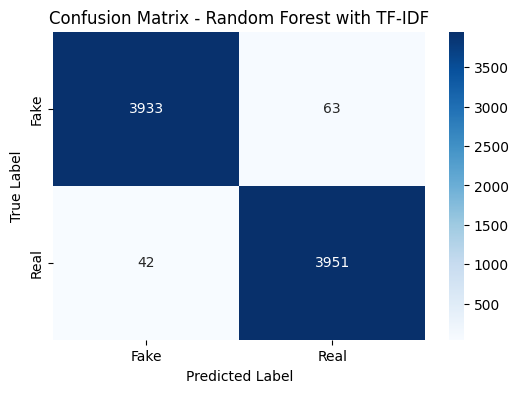

In [54]:
# Step 1: TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Initialize and train RF with default params
rf_default = RandomForestClassifier(random_state=42)
rf_default.fit(X_train_tfidf, y_train)

# Predict on test data
y_pred_rf = rf_default.predict(X_test_tfidf)

# # Step 5: Evaluate performance
acc_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Model Accuracy: {acc_rf:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))

# # Confusion Matrix Plot
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Random Forest with TF-IDF')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks(np.arange(2) + 0.5, labels=['Fake', 'Real'])
plt.yticks(np.arange(2) + 0.5, labels=['Fake', 'Real'])
plt.show()


#Model_3 TFIDF +Navie Base

In [55]:
#nb1_model_tf = nb1.fit(X_train_tfidf, y_train)
nb1_model_tf = best_nb.fit(X_train_tfidf, y_train)
pred1_tf = nb1_model_tf.predict(X_test_tfidf)
print("Model 3 Accuracy:", accuracy_score(y_test, pred1_tf))



Model 3 Accuracy: 0.9385404931781199


In [24]:
confusion_matrix(y_test, pred1_tf)


array([[3519,  477],
       [ 173, 3820]])

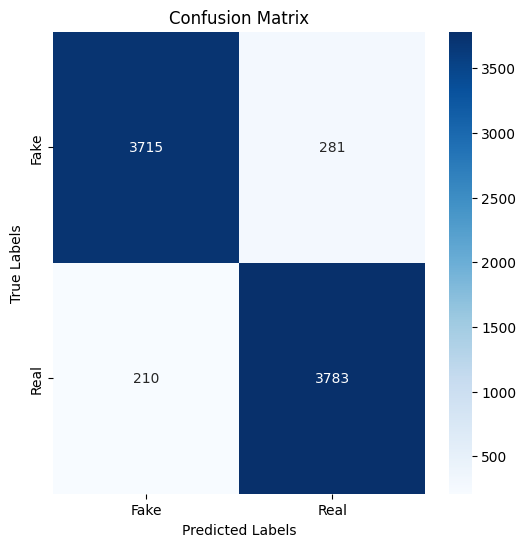

In [56]:
plt.figure(figsize=(6, 6))
sns.heatmap(confusion_matrix(y_test, pred1_tf), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
xtricklabels = ['Fake', 'Real']
ytricklabels = ['Fake', 'Real']
plt.xticks(np.arange(2) + 0.5, labels=xtricklabels)
plt.yticks(np.arange(2) + 0.5, labels=ytricklabels) # Add this line to label y-axis
plt.show()


In [66]:
from sklearn.metrics import classification_report
import pandas as pd

# Assuming y_test contains integer labels (0 and 1)
# Map integer labels to string labels for classification report
target_names = ['fake', 'real']

# Generate classification reports with target_names
report1 = classification_report(y_test, pred1, target_names=target_names, output_dict=True, zero_division=0)
report2 = classification_report(y_test, y_pred_rf, target_names=target_names, output_dict=True, zero_division=0)
report3 = classification_report(y_test, pred1_tf, target_names=target_names, output_dict=True, zero_division=0)

# Extract metrics for the table
model_comparison = {
    'Model': ['CountVectorizer + Naive Bayes', 'TF-IDF + Random Forest', 'TF-IDF + Naive Bayes'],
    'Accuracy': [accuracy_score(y_test, pred1), accuracy_score(y_test, y_pred_rf), accuracy_score(y_test, pred1_tf)],
    'Fake_Precision': [report1['fake']['precision'], report2['fake']['precision'], report3['fake']['precision']],
    'Fake_Recall': [report1['fake']['recall'], report2['fake']['recall'], report3['fake']['recall']],
    'Fake_F1-score': [report1['fake']['f1-score'], report2['fake']['f1-score'], report3['fake']['f1-score']],
    'Real_Precision': [report1['real']['precision'], report2['real']['precision'], report3['real']['precision']],
    'Real_Recall': [report1['real']['recall'], report2['real']['recall'], report3['real']['recall']],
    'Real_F1-score': [report1['real']['f1-score'], report2['real']['f1-score'], report3['real']['f1-score']]
}

comparison_df = pd.DataFrame(model_comparison)
comparison_df_sorted = comparison_df.sort_values(by='Accuracy', ascending=False)
display(comparison_df_sorted)



,Model,Accuracy,Fake_Precision,Fake_Recall,Fake_F1-score,Real_Precision,Real_Recall,Real_F1-score
1,TF-IDF + Random Forest,0.986857,0.989434,0.984234,0.986827,0.984305,0.989482,0.986886
2,TF-IDF + Naive Bayes,0.938540,0.946497,0.929680,0.938013,0.930856,0.947408,0.939059
0,CountVectorizer + Naive Bayes,0.934159,0.949482,0.917167,0.933045,0.919835,0.951165,0.935238


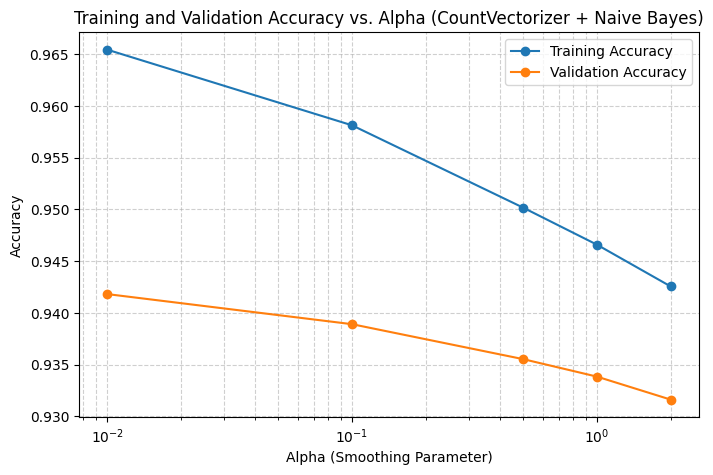

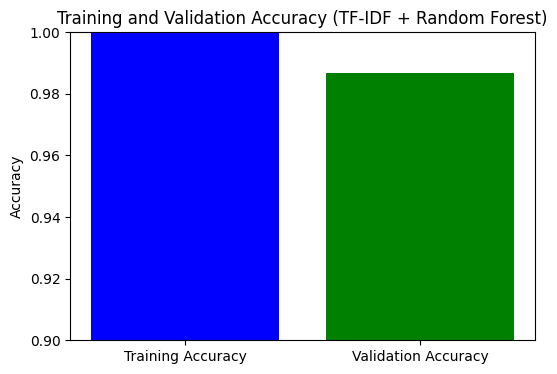

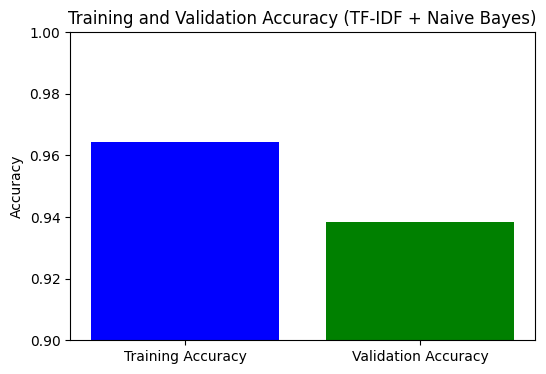

In [63]:
# For CountVectorizer + Naive Bayes
results = grid.cv_results_
train_scores = results['mean_train_score']
val_scores = results['mean_test_score']
params = results['params']

alpha_values = [p['alpha'] for p in params]

plt.figure(figsize=(8, 5))
plt.plot(alpha_values, train_scores, label='Training Accuracy', marker='o')
plt.plot(alpha_values, val_scores, label='Validation Accuracy', marker='o')
plt.xscale('log')
plt.xlabel('Alpha (Smoothing Parameter)')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy vs. Alpha (CountVectorizer + Naive Bayes)')
plt.legend()
plt.grid(True, which="both", linestyle='--', alpha=0.6)
plt.show()

# For TF-IDF + Random Forest
# Calculate training accuracy
y_train_pred_rf = rf_default.predict(X_train_tfidf)
train_acc_rf = accuracy_score(y_train, y_train_pred_rf)

# Calculate validation accuracy (already have this as acc_rf)
val_acc_rf = acc_rf

plt.figure(figsize=(6, 4))
plt.bar(['Training Accuracy', 'Validation Accuracy'], [train_acc_rf, val_acc_rf], color=['blue', 'green'])
plt.ylim(0.9, 1.0)
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy (TF-IDF + Random Forest)')
plt.show()

# For TF-IDF + Naive Bayes
# Calculate training accuracy
y_train_pred_nb_tf = nb1_model_tf.predict(X_train_tfidf)
train_acc_nb_tf = accuracy_score(y_train, y_train_pred_nb_tf)

# Calculate validation accuracy (already have this as accuracy_score(y_test, pred1_tf))
val_acc_nb_tf = accuracy_score(y_test, pred1_tf)

plt.figure(figsize=(6, 4))
plt.bar(['Training Accuracy', 'Validation Accuracy'], [train_acc_nb_tf, val_acc_nb_tf], color=['blue', 'green'])
plt.ylim(0.9, 1.0)
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy (TF-IDF + Naive Bayes)')
plt.show()

In [77]:
from sklearn.metrics import accuracy_score, f1_score
import pandas as pd
from IPython.display import display
# Calculate metrics for each model (Training and Validation)

# CountVectorizer + Naive Bayes (Default Alpha)
y_train_pred_cv_nb_default = nb1.predict(X_train_cv)
train_acc_cv_nb_default = accuracy_score(y_train, y_train_pred_cv_nb_default)
train_f1_cv_nb_default = f1_score(y_train, y_train_pred_cv_nb_default, pos_label=positive_class_label)

val_acc_cv_nb_default = accuracy_score(y_test, pred1)
val_f1_cv_nb_default = f1_score(y_test, pred1, pos_label=positive_class_label)

# CountVectorizer + Naive Bayes (Best Alpha)
y_train_pred_cv_nb_best = best_nb.predict(X_train_cv)
train_acc_cv_nb_best = accuracy_score(y_train, y_train_pred_cv_nb_best)
train_f1_cv_nb_best = f1_score(y_train, y_train_pred_cv_nb_best, pos_label=positive_class_label)

val_acc_cv_nb_best = accuracy_score(y_test, y_pred_best)
val_f1_cv_nb_best = f1_score(y_test, y_pred_best, pos_label=positive_class_label)

# TF-IDF + Random Forest
y_train_pred_tfidf_rf = rf_default.predict(X_train_tfidf)
train_acc_tfidf_rf = accuracy_score(y_train, y_train_pred_tfidf_rf)
train_f1_tfidf_rf = f1_score(y_train, y_train_pred_tfidf_rf, pos_label=positive_class_label)

val_acc_tfidf_rf = accuracy_score(y_test, y_pred_rf)
val_f1_tfidf_rf = f1_score(y_test, y_pred_rf, pos_label=positive_class_label)

# TF-IDF + Naive Bayes
y_train_pred_tfidf_nb = nb1_model_tf.predict(X_train_tfidf)
train_acc_tfidf_nb = accuracy_score(y_train, y_train_pred_tfidf_nb)
train_f1_tfidf_nb = f1_score(y_train, y_train_pred_tfidf_nb, pos_label=positive_class_label)

val_acc_tfidf_nb = accuracy_score(y_test, pred1_tf)
val_f1_tfidf_nb = f1_score(y_test, pred1_tf, pos_label=positive_class_label)


# Create a dictionary to hold the comparison data
model_comparison_data = {
    'Model': [
        'CountVectorizer + Naive Bayes (Default Alpha)',
        'CountVectorizer + Naive Bayes (Best Alpha)',
        'TF-IDF + Random Forest',
        'TF-IDF + Naive Bayes'
    ],
    'Training Accuracy': [
        train_acc_cv_nb_default,
        train_acc_cv_nb_best,
        train_acc_tfidf_rf,
        train_acc_tfidf_nb
    ],
    'Validation Accuracy': [
        val_acc_cv_nb_default,
        val_acc_cv_nb_best,
        val_acc_tfidf_rf,
        val_acc_tfidf_nb
    ],
     'Training F1 Score': [ # Simplified column name
        train_f1_cv_nb_default,
        train_f1_cv_nb_best,
        train_f1_tfidf_rf,
        train_f1_tfidf_nb
    ],
    'Validation F1 Score': [ # Simplified column name
        val_f1_cv_nb_default,
        val_f1_cv_nb_best,
        val_f1_tfidf_rf,
        val_f1_tfidf_nb
    ]
}

# Create the pandas DataFrame
comparison_df = pd.DataFrame(model_comparison_data)

# Sort the DataFrame by Validation Accuracy in descending order
comparison_df_sorted = comparison_df.sort_values(by='Validation Accuracy', ascending=False)

# Display the sorted table
print("Model Comparison (Training and Validation Metrics, Sorted by Validation Accuracy):")
display(comparison_df_sorted)

Model Comparison (Training and Validation Metrics, Sorted by Validation Accuracy):


,Model,Training Accuracy,Validation Accuracy,Training F1 Score,Validation F1 Score
2,TF-IDF + Random Forest,1.000000,0.986857,1.000000,0.986827
1,CountVectorizer + Naive Bayes (Best Alpha),0.964260,0.944549,0.963774,0.944143
3,TF-IDF + Naive Bayes,0.964385,0.938540,0.963944,0.938013
0,CountVectorizer + Naive Bayes (Default Alpha),0.946108,0.934159,0.944903,0.933045


##Summary





The notebook focuses on building and comparing different machine learning models for fake news detection. The workflow involves:

Data Loading and Preprocessing: Loading the data, dropping irrelevant columns ('title', 'subject', 'date'), checking for class balance (which appears balanced), and handling null values (none found). A text preprocessing pipeline is implemented to tokenize, remove stopwords, remove punctuation and numbers, and lemmatize the text data.
Feature Extraction: Two methods are used: CountVectorizer (Bag of Words) and TF-IDF Vectorizer.
Model Development and Evaluation: Three models are built and evaluated:\
countVectorizer + Naive Bayes (both with default alpha and tuned alpha using GridSearchCV).
TF-IDF + Random Forest (using default parameters).
TF-IDF + Naive Bayes (using the best alpha found for the CountVectorizer + Naive Bayes model).
Model Comparison: The models are compared based on accuracy, precision, recall, and F1-score on the test set, presented in a table. Visualizations of confusion matrices and accuracy/F1 score comparisons are also included.


## Conclusion and Model Choice

To determine the best model, we should consider both training and validation metrics, focusing on the model that performs well on unseen data (validation set) and shows a good balance between precision and recall (often indicated by the F1-score), especially for both classes ('fake' and 'real').

Looking at the "Model Comparison (Training and Validation Metrics, Sorted by Validation Accuracy)" table you generated:

The "TF-IDF + Random Forest" model demonstrates the highest Validation Accuracy and Validation F1 Score among the models evaluated. While the training accuracy for Random Forest is very high (indicating potential overfitting), the validation accuracy and F1 score are also strong and are the best on the unseen test data.

The Naive Bayes models, both with CountVectorizer and TF-IDF, perform slightly worse on the validation set compared to Random Forest. Hyperparameter tuning for the CountVectorizer + Naive Bayes model did improve its performance compared to the default alpha, but it still lags behind the Random Forest model.

#Saving Model (TF-IDF and Random Forest)

Save the trained TF-IDF vectorizer and Random Forest model to disk using pickle, and download them to y local machine for future use (e.g., in another Colab notebook).


In [78]:
import pickle
from google.colab import files

# Define filenames for your objects
tfidf_filename = 'tfidf_vectorizer.pkl'
model_filename = 'random_forest_model.pkl'

# Save the TF-IDF vectorizer
with open(tfidf_filename, 'wb') as file:
    pickle.dump(tfidf_vectorizer, file)

# Save the trained Random Forest model
with open(model_filename, 'wb') as file:
    pickle.dump(rf_default, file)

# Download both files
files.download(tfidf_filename)
files.download(model_filename)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>